## Ideas

- Discoveries per year
- Statistical analysis of mass, period

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

![img](https://lh3.googleusercontent.com/ia1XqXPsY1-hKZOyMMxtP8vWQkCw5JOJgIle_dztdip0yf-FzYH_T82Vj8gpGhrmdA1ui7kz_YnnGhtRB3lCsn7zLEOaBXbqxCpR1521pAWFg7YRQKLXUDk_P0botZ4_uQ=w1280)

In [3]:
s_earth = 1361.0 # W/m^2
r_earth = 6378.137 # km

In [46]:
def ESI(s, r):
    # Returns ESI for a given s, r
    # Params: s: solar flux (earth flux), r: planet radius (earth radius)
    return 1 - np.sqrt(0.5 * ( ((s-s_earth)/(s+s_earth))**2 + ((r-r_earth)/(r_earth+r))**2 ))

In [35]:
s = np.linspace(10e-4, 10e+2, int(10e+3)) 
r = np.linspace(10e-3, 10e+1, int(10e+3))
ss, rr = np.meshgrid(s, r)
esi = ESI(ss * s_earth, rr * r_earth)

Import NASA Exoplanet Data:

In [230]:
nasa_csv = pd.read_csv('exoplanet_q1.csv').drop_duplicates('pl_name')
nasa_disc_year = np.array(nasa_csv['disc_year'].dropna())
nasa_data = nasa_csv[['pl_rade', 'pl_insol', 'disc_year']].dropna().sort_values('disc_year', ascending=False)
svals = np.array(nasa_data['pl_insol'])
rvals = np.array(nasa_data['pl_rade'])

Import HEC Data:

In [90]:
hec_csv = pd.read_csv('hec.csv')
hec_svals = np.array(hec_csv['pl_insol'])
hec_rvals = np.array(hec_csv['pl_rade'])
hec_temps = np.array(hec_csv['pl_eqt'])
hec_dist = np.array(hec_csv['sy_dist'])

In [91]:
lvls = np.linspace(0, 1, 9)

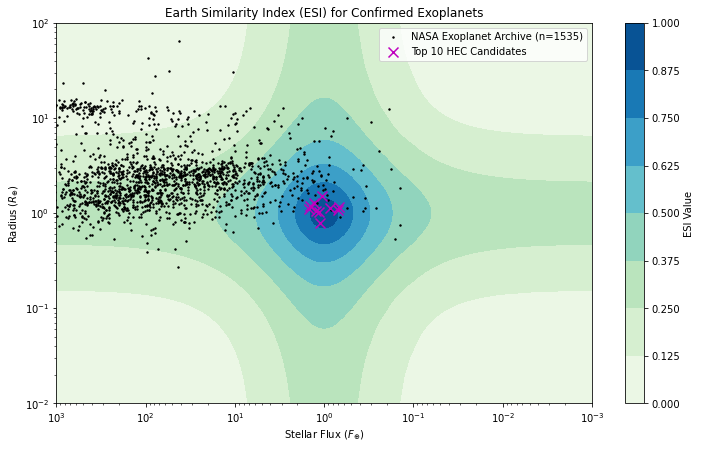

In [287]:
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(10e-4, 10e2)
ax1.set_ylim(10e-3, 10e1)
ax1.set_title('Earth Similarity Index (ESI) for Confirmed Exoplanets')
ax1.set_xlabel(r'Stellar Flux $(F_{\oplus})$')
ax1.set_ylabel(r'Radius $(R_{\oplus})$')
ax1.invert_xaxis()
cont = ax1.contourf(ss, rr, esi, cmap='GnBu', levels=lvls)
ax1.scatter(svals, rvals, s=2, c='k', label='NASA Exoplanet Archive (n=1535)')
ax1.scatter(hec_svals, hec_rvals, s=100, marker='x', c='m', label='Top 10 HEC Candidates')
ax1.legend()
fig1.colorbar(cont, label='ESI Value')
plt.show()
# fig1.savefig('img/esi_phase.jpg')

Compare Solar Flux with Surface Temperature:

In [40]:
# Polynomial fit line (p=1, linear)
model_coeff = np.polyfit(hec_svals, hec_temps, 1)
model_func = np.poly1d(model_coeff)
x = np.arange(0.7, 1.5, 0.01)
f_x = model_func(x)

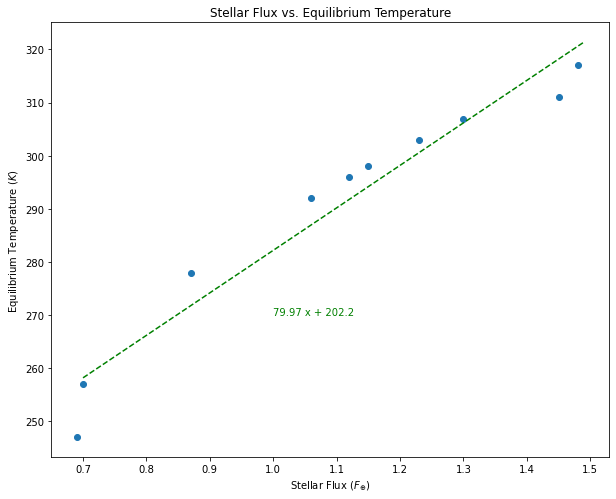

In [294]:
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(hec_svals, hec_temps)
ax2.plot(x, f_x, '--', c='g')
ax2.set_xlabel(r'Stellar Flux ($F_{\oplus}$)')
ax2.set_ylabel(r'Equilibrium Temperature ($K$)')
ax2.set_title('Stellar Flux vs. Equilibrium Temperature')
ax2.text(1.0, 270, s=str(model_func), c='g')
plt.show()
# fig2.savefig('img/flux_v_temp.jpg')


Compare discoveries per year:

In [42]:
year_bins = np.bincount(nasa_disc_year)[2000:2023] # from years 2000 to 2022
years = np.arange(2000, 2022+1, 1)

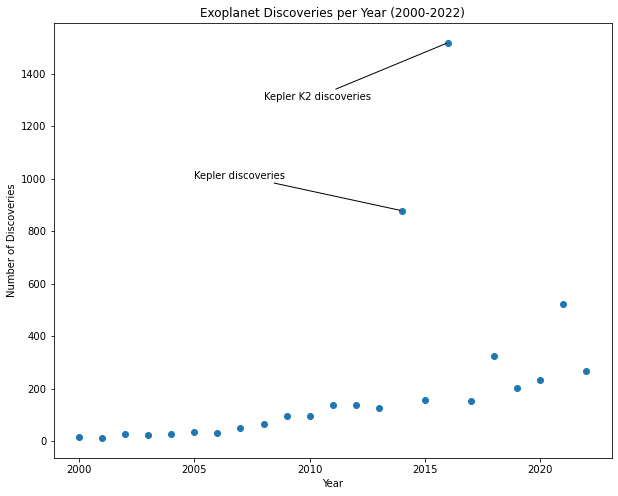

In [293]:
fig3, ax3 = plt.subplots(figsize=(10, 8))
ax3.scatter(years, year_bins)
ax3.set_title('Exoplanet Discoveries per Year (2000-2022)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Discoveries')
ax3.annotate('Kepler K2 discoveries', xy=(2016, 1518), xytext=(2008, 1300),
    arrowprops=dict(arrowstyle='-')
)
ax3.annotate('Kepler discoveries', xy=(2014, 878), xytext=(2005, 1000),
    arrowprops=dict(arrowstyle='-')
)
plt.show()
# fig3.savefig('img/discoveries.jpg')

In [267]:
nasa_more_data = nasa_csv[['pl_rade', 'pl_insol', 'pl_orbper', 'st_mass', 'st_rad']].dropna()
nasa_more_data['pl_esi'] = ESI(nasa_more_data['pl_insol'], nasa_more_data['pl_rade'])
nasa_more_data['esi_bin'] = pd.cut(nasa_more_data['pl_esi'], bins=np.arange(0, 1.1, 0.1))

In [268]:
mask = np.array([False, True])

orb_grouped = nasa_more_data['pl_orbper'].groupby(nasa_more_data['esi_bin'])
orb_g_array = np.array(orb_grouped, dtype=object)[:4]
orb_masked = orb_g_array[:, mask]
orb_data = np.array([i[0].array for i in orb_masked], dtype=object)

rad_grouped = nasa_more_data['pl_rade'].groupby(nasa_more_data['esi_bin'])
rad_g_array = np.array(rad_grouped, dtype=object)[:4]
rad_masked = rad_g_array[:, mask]
rad_data = np.array([i[0].array for i in rad_masked], dtype=object)

st_m_grouped = nasa_more_data['st_mass'].groupby(nasa_more_data['esi_bin'])
st_m_g_array = np.array(st_m_grouped, dtype=object)[:4]
st_m_masked = st_m_g_array[:, mask]
st_m_data = np.array([i[0].array for i in st_m_masked], dtype=object)

st_r_grouped = nasa_more_data['st_mass'].groupby(nasa_more_data['esi_bin'])
st_r_g_array = np.array(st_r_grouped, dtype=object)[:4]
st_r_masked = st_r_g_array[:, mask]
st_r_data = np.array([i[0].array for i in st_r_masked], dtype=object)

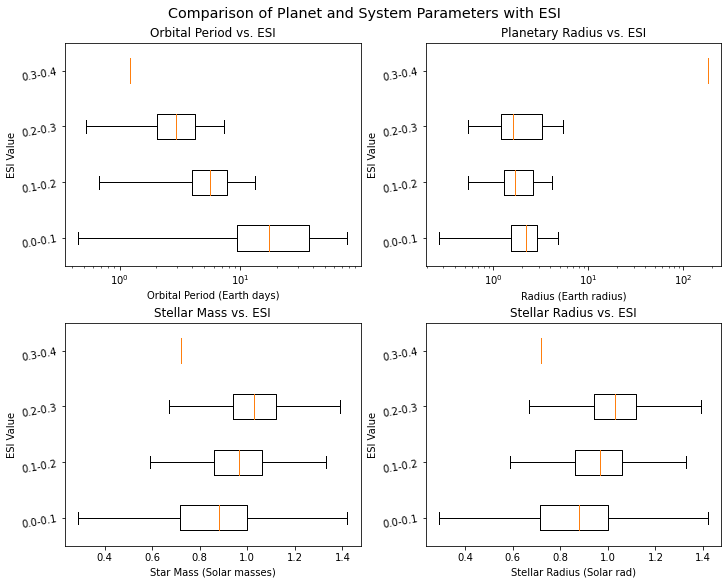

In [290]:
fig4, axd = plt.subplot_mosaic([['upper left', 'upper right'], ['lower left', 'lower right']],
                figsize=(10, 8), layout='constrained')

fig4.suptitle('Comparison of Planet and System Parameters with ESI', fontsize='x-large')

axd['upper left'].boxplot(orb_data, vert=False, sym='')
axd['upper left'].set_title('Orbital Period vs. ESI')
axd['upper left'].set_xlabel('Orbital Period (Earth days)')
axd['upper left'].set_xscale('log')
axd['upper left'].set_yticks([1, 2, 3, 4], ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4'], rotation=10)
axd['upper left'].set_ylabel('ESI Value')

axd['upper right'].boxplot(rad_data, vert=False, sym='')
axd['upper right'].set_title('Planetary Radius vs. ESI')
axd['upper right'].set_xlabel('Radius (Earth radius)')
axd['upper right'].set_xscale('log')
axd['upper right'].set_yticks([1, 2, 3, 4], ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4'], rotation=10)
axd['upper right'].set_ylabel('ESI Value')

axd['lower left'].boxplot(st_m_data, vert=False, sym='')
axd['lower left'].set_title('Stellar Mass vs. ESI')
axd['lower left'].set_xlabel('Star Mass (Solar masses)')
axd['lower left'].set_yticks([1, 2, 3, 4], ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4'], rotation=10)
axd['lower left'].set_ylabel('ESI Value')

axd['lower right'].boxplot(st_r_data, vert=False, sym='')
axd['lower right'].set_title('Stellar Radius vs. ESI')
axd['lower right'].set_xlabel('Stellar Radius (Solar rad)')
axd['lower right'].set_yticks([1, 2, 3, 4], ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4'], rotation=10)
axd['lower right'].set_ylabel('ESI Value')

plt.show()
# fig4.savefig('img/parameters_v_esi.jpg')